In [10]:
import pandas as pd
from pathlib import Path
id_lookup_table = pd.read_csv("/home/changbae/fmri_project/MDMR/notebook/data/id_lookup_table.csv")
demographics = pd.read_excel("/home/changbae/fmri_project/MDMR/notebook/data/demographics.xlsx", skiprows=1, header=0)

# Display the columns to understand their structure
print(demographics.columns)

# Rename columns, handling potential newlines and extra spaces in column names
demographics.columns = [
    'GROUP', 'Exp No.', 'Chart No.', '이름', '1. SEX', '2.AGE', '3-1. EDU', '3-2. YR_EDU', 
    '4. JOB', '5. SES', '정신질환 가족/친척 유무', '참가자와 관계', '정신과입원유무', '질환명', 
    '현재 질병 유무', '병명', '과거 뇌외상/뇌질환', '정신질환 유무', '병명2', '입원횟수', 
    '첫 정신과적 입원 (몇년 전)', '첫 정신과적 입원 (입원 년도)', '발병시기 (몇년 전)', 
    '발병시기 (입원 년도)', '항정신병 약물', '향정신병약물/ 용량(mg/tab)', '용량(tab)', 
    '현 용량 시작일', '기타 약물(약품명/용량)', '총 약물 치료기간', '비고'
]

Index(['참여집단', '내부 부여 번호', '병록번호', '이름', '성별', '만 나이', '학력', '교육 기간', '직업',
       '자신', '부모', '정신질환\n가족/친척 유무', '참가자와 관계', '정신과입원유무', '질환명', '현재 질병 유무',
       '병명', '과거 뇌외상/\n뇌질환', '정신질환 유무', '병명 ', '입원횟수', '첫 정신과적 입원\n(몇년 전)',
       '첫 정신과적 입원\n(입원 년도)', '발병시기\n(몇년 전)', '발병시기\n(입원 년도)', '항정신병 약물',
       '향정신병약물/ \n용량(mg/tab)', '용량\n(tab)', '현 용량 시작일', '기타 약물\n(약품명/용량)',
       '총 약물 치료기간'],
      dtype='object')


In [17]:
# Define the function to generate fmri codes
def generate_fmri_code(row):
    prefix = 's' if row['GROUP'] == 'EXP' else 'c'
    return f"{prefix}{int(row['Exp No.']):04d}"

# Apply the function to each row
demographics['fmri_code'] = demographics.apply(generate_fmri_code, axis=1)

# Merge the two DataFrames
merged_df = pd.merge(demographics, id_lookup_table, on=['fmri_code'], how='left')

# Display the resulting DataFrame
filtered_df = merged_df.dropna(subset=['fmri_code'])

# Display the length of the filtered DataFrame
print(f"Length of the filtered DataFrame: {len(filtered_df)}")

Length of the filtered DataFrame: 164


In [18]:
filtered_df

,GROUP,Exp No.,Chart No.,이름_x,1. SEX,2.AGE,3-1. EDU,3-2. YR_EDU,4. JOB,5. SES,...,현 용량 시작일,기타 약물(약품명/용량),총 약물 치료기간,비고,fmri_code,Unnamed: 0,Screening #,Enrollment #,HAID ID,이름_y
0,EXP,7,9376069,장찬경,2,20,3.0,12.0,대학생,3.0,...,NaN,NaN,NaN,NaN,s0007,0.0,1.0,EXP-0001,0827jck,장찬경
1,EXP,5,10360325,윤나예,2,20,3.0,12.0,대학생,4.0,...,NaN,NaN,NaN,NaN,s0005,1.0,2.0,EXP-0002,na0840,윤나예
2,EXP,4,9378115,조예진,2,21,3.0,15.0,대학생,5.0,...,NaN,2022-09-27 (1m),NaN,NaN,s0004,2.0,3.0,EXP-0003,spwls915,조예진
3,HC,9,3370584,장윤준,1,25,3.0,15.0,대학생,3.0,...,NaN,NaN,NaN,NaN,c0009,3.0,4.0,HC-0001,wkddbswns,장윤준
4,EXP,12,9378229,박정은,2,30,5.0,12.0,회사원,3.0,...,NaN,2wks,NaN,NaN,s0012,4.0,5.0,EXP-0004,bje5409,박정은
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,EXP,574,20116434,김한결,2,19,3.0,12.0,학생,3.0,...,NaN,NaN,NaN,NaN,s0574,NaN,NaN,NaN,NaN,NaN
160,EXP,562,1622273,박현진,2,39,6.0,20.0,회사원,2.0,...,NaN,NaN,NaN,NaN,s0562,NaN,NaN,NaN,NaN,NaN
161,EXP,583,20118313,최고운,1,19,3.0,12.0,학생,4.0,...,NaN,NaN,NaN,NaN,s0583,NaN,NaN,NaN,NaN,NaN
162,HC,549,20114543,양정길,2,35,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,c0549,166.0,167.0,HC-0076,yyyyjg,양정길


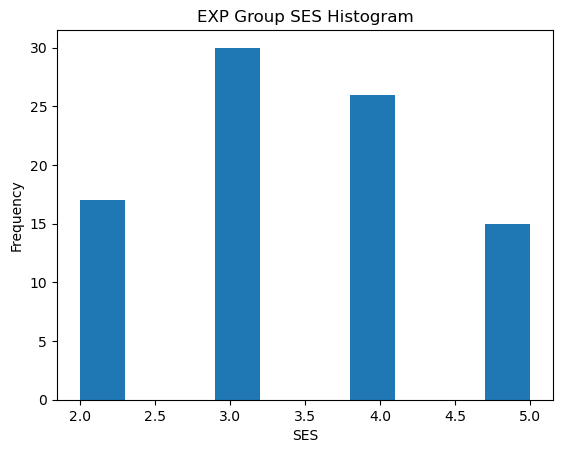

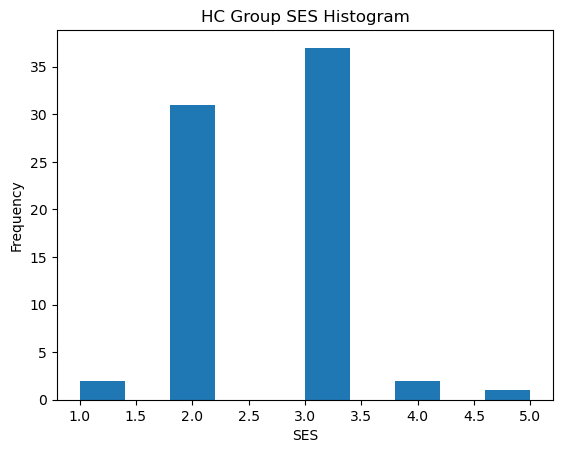

{'EXP': {'sex_percentage': {1: 54.44444444444444, 2: 45.55555555555556}, 'sex_sd': np.float64(0.5008108282005754), 'age_mean': np.float64(28.866666666666667), 'age_sd': np.float64(7.51956250221508), 'edu_mean': np.float64(14.8125), 'edu_sd': np.float64(2.5711848201384404)}, 'HC': {'sex_percentage': {1: 50.0, 2: 50.0}, 'sex_sd': np.float64(0.5034130089044646), 'age_mean': np.float64(29.93243243243243), 'age_sd': np.float64(7.1927114575666415), 'edu_mean': np.float64(15.39041095890411), 'edu_sd': np.float64(2.4155839174204767)}}


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_groups(filtered_df):
    results = {}
    
    for group in ['EXP', 'HC']:
        group_data = filtered_df[filtered_df['GROUP'] == group]
        
        # 성별 비율 및 표준 편차
        sex_counts = group_data['1. SEX'].value_counts(normalize=True) * 100
        sex_sd = group_data['1. SEX'].std()
        
        # 나이 및 표준 편차
        age_mean = group_data['2.AGE'].astype(float).mean()
        age_sd = group_data['2.AGE'].astype(float).std()
        
        # 교육 연수 및 표준 편차
        edu_mean = group_data['3-2. YR_EDU'].astype(float).mean()
        edu_sd = group_data['3-2. YR_EDU'].astype(float).std()
        
        # SES 히스토그램
        plt.figure()
        group_data['5. SES'].astype(float).hist(bins=10)
        plt.title(f'{group} Group SES Histogram')
        plt.xlabel('SES')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()
        
        results[group] = {
            'sex_percentage': sex_counts.to_dict(),
            'sex_sd': sex_sd,
            'age_mean': age_mean,
            'age_sd': age_sd,
            'edu_mean': edu_mean,
            'edu_sd': edu_sd
        }
    
    return results

# Example usage
results = analyze_groups(filtered_df)
print(results)

In [26]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.stats import ttest_ind, chi2_contingency

def analyze_groups(filtered_df):
    results = {}
    total_count = len(filtered_df)
    
    for group in ['EXP', 'HC']:
        group_data = filtered_df[filtered_df['GROUP'] == group]
        group_count = len(group_data)
        group_percentage = (group_count / total_count) * 100
        
        # 성별 비율 및 표준 편차
        sex_counts = group_data['1. SEX'].value_counts(normalize=True) * 100
        sex_sd = group_data['1. SEX'].std()
        
        # 나이 및 표준 편차
        age_mean = group_data['2.AGE'].astype(float).mean()
        age_sd = group_data['2.AGE'].astype(float).std()
        
        # 교육 연수 및 표준 편차
        edu_mean = group_data['3-2. YR_EDU'].astype(float).mean()
        edu_sd = group_data['3-2. YR_EDU'].astype(float).std()
        
        results[group] = {
            'count': group_count,
            'percentage': group_percentage,
            'sex_percentage': sex_counts.to_dict(),
            'sex_sd': sex_sd,
            'age_mean': age_mean,
            'age_sd': age_sd,
            'edu_mean': edu_mean,
            'edu_sd': edu_sd
        }
    
    return results

def calculate_t_tests(filtered_df):
    exp_data = filtered_df[filtered_df['GROUP'] == 'EXP']
    hc_data = filtered_df[filtered_df['GROUP'] == 'HC']
    
    # Drop rows with NaN values for the t-test
    exp_data_age = exp_data['2.AGE'].astype(float).dropna()
    hc_data_age = hc_data['2.AGE'].astype(float).dropna()
    
    exp_data_edu = exp_data['3-2. YR_EDU'].astype(float).dropna()
    hc_data_edu = hc_data['3-2. YR_EDU'].astype(float).dropna()
    
    # 나이와 교육 연수에 대해 t-test를 수행
    age_ttest = ttest_ind(exp_data_age, hc_data_age)
    edu_ttest = ttest_ind(exp_data_edu, hc_data_edu)
    
    return {
        'age_p_value': age_ttest.pvalue,
        'edu_p_value': edu_ttest.pvalue
    }

def calculate_chi2_test(filtered_df):
    contingency_table = pd.crosstab(filtered_df['GROUP'], filtered_df['1. SEX'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

def generate_markdown_table(results, t_tests, sex_p_value):
    headers = ["Metric", "EXP", "HC", "p-value"]
    table = []
    
    exp = results['EXP']
    hc = results['HC']
    
    # 성별 비율 및 표준 편차
    table.append(["Sex (Male %)", exp['sex_percentage'].get(1, 0), hc['sex_percentage'].get(1, 0), sex_p_value])
    table.append(["Sex (Female %)", exp['sex_percentage'].get(2, 0), hc['sex_percentage'].get(2, 0), "N/A"])
    table.append(["Sex SD", exp['sex_sd'], hc['sex_sd'], "N/A"])
    
    # 나이 및 표준 편차
    table.append(["Age Mean", exp['age_mean'], hc['age_mean'], t_tests['age_p_value']])
    table.append(["Age SD", exp['age_sd'], hc['age_sd'], "N/A"])
    
    # 교육 연수 및 표준 편차
    table.append(["Edu Mean", exp['edu_mean'], hc['edu_mean'], t_tests['edu_p_value']])
    table.append(["Edu SD", exp['edu_sd'], hc['edu_sd'], "N/A"])
    
    # 그룹별 카운트 및 전체 비율
    table.append(["Count", exp['count'], hc['count'], "N/A"])
    table.append(["Percentage", exp['percentage'], hc['percentage'], "N/A"])
    
    # Generate markdown table using tabulate
    markdown_table = tabulate(table, headers, tablefmt="github")
    
    return markdown_table

def check_missing_values(filtered_df):
    metrics = ['1. SEX', '2.AGE', '3-2. YR_EDU', '5. SES']
    missing_info = {}
    
    for metric in metrics:
        total_missing = filtered_df[metric].isna().sum()
        total_count = len(filtered_df)
        missing_percentage = (total_missing / total_count) * 100
        missing_info[metric] = {
            'missing_count': total_missing,
            'missing_percentage': missing_percentage
        }
    
    return missing_info

# Example usage
# Assuming `filtered_df` is your DataFrame after filtering out rows without `fmri_code`
results = analyze_groups(filtered_df)
t_tests = calculate_t_tests(filtered_df)
sex_p_value = calculate_chi2_test(filtered_df)
markdown_table = generate_markdown_table(results, t_tests, sex_p_value)
missing_values_info = check_missing_values(filtered_df)

print(markdown_table)
print("Missing values information:")
print(missing_values_info)


| Metric         |       EXP |        HC | p-value             |
|----------------|-----------|-----------|---------------------|
| Sex (Male %)   | 54.4444   | 50        | 0.6817933439431252  |
| Sex (Female %) | 45.5556   | 50        | N/A                 |
| Sex SD         |  0.500811 |  0.503413 | N/A                 |
| Age Mean       | 28.8667   | 29.9324   | 0.35840887822321454 |
| Age SD         |  7.51956  |  7.19271  | N/A                 |
| Edu Mean       | 14.8125   | 15.3904   | 0.14651796465385805 |
| Edu SD         |  2.57118  |  2.41558  | N/A                 |
| Count          | 90        | 74        | N/A                 |
| Percentage     | 54.878    | 45.122    | N/A                 |
Missing values information:
{'1. SEX': {'missing_count': np.int64(0), 'missing_percentage': np.float64(0.0)}, '2.AGE': {'missing_count': np.int64(0), 'missing_percentage': np.float64(0.0)}, '3-2. YR_EDU': {'missing_count': np.int64(3), 'missing_percentage': np.float64(1.82926829268292